In [1]:
import numpy as np
import pandas as pd
import zipfile
import gc
gc.enable()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Data_btp2/"
train=zipfile.ZipFile(path+"data_train"+".zip","r")
test=zipfile.ZipFile(path+"data_test"+".zip","r")

In [4]:
data_train = pd.read_csv(train.open('data_train.csv'))
data_test = pd.read_csv(test.open('data_test.csv'))



In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4833292 entries, 0 to 4833291
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   user_id                      int64  
 1   product_id                   int64  
 2   uxp_times_bought             int64  
 3   uxp_reorder_ratio            float64
 4   uxp_last_five                float64
 5   uxp_ratio_last_five          float64
 6   u_num_of_orders              int64  
 7   u_avg_prd                    float64
 8   dow_u_most_orders            int64  
 9   hod_u_most_orders            int64  
 10  u_reorder_ratio              float64
 11  average_days_between_orders  float64
 12  u_total_items_bought         int64  
 13  p_num_of_times               int64  
 14  p_reorder_ratio              float64
 15  p_avg_cart_position          float64
 16  aisle_id                     float64
 17  department_id                float64
dtypes: float64(10), int64(8)
memory usage: 663

In [6]:
data_test.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,u_avg_prd,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,average_days_between_orders,u_total_items_bought,p_num_of_times,p_reorder_ratio,p_avg_cart_position,aisle_id,department_id
0,3,248,1,0.090909,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,6371,0.400251,10.620782,0.070016,0.088504
1,3,1005,1,0.333333,1.0,0.2,12,7.333333,0,16,0.625,13.590909,88,463,0.440605,9.498920,0.066098,0.126562
2,3,1819,3,0.333333,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,2424,0.492162,9.287541,0.063782,0.037791
3,3,7503,1,0.100000,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,12474,0.553551,9.547379,0.070016,0.088504
4,3,8021,1,0.090909,0.0,0.0,12,7.333333,0,16,0.625,13.590909,88,27864,0.591157,8.822854,0.095193,0.054678


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8474661 entries, 0 to 8474660
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   user_id                      int64  
 1   product_id                   int64  
 2   uxp_times_bought             int64  
 3   uxp_reorder_ratio            float64
 4   uxp_last_five                float64
 5   uxp_ratio_last_five          float64
 6   u_num_of_orders              int64  
 7   u_avg_prd                    float64
 8   dow_u_most_orders            int64  
 9   hod_u_most_orders            int64  
 10  u_reorder_ratio              float64
 11  average_days_between_orders  float64
 12  u_total_items_bought         int64  
 13  p_num_of_times               int64  
 14  p_reorder_ratio              float64
 15  p_avg_cart_position          float64
 16  reordered                    float64
 17  aisle_id                     float64
 18  department_id                float64
dtype

In [13]:
pip install scikit-plot

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import f1_score, classification_report
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.classifiers import plot_feature_importances

In [15]:
import xgboost as xgb
import lightgbm as lgb

In [16]:
X = data_train.drop(['reordered', 'uxp_ratio_last_five'], axis=1)
y = data_train.reordered

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [18]:
del [data_train]
gc.collect()

86

In [19]:
parameters = {
    'eavl_metric' : 'logloss',
    'max_depth' : 5,
    'colsample_bytree' : 0.4,
    'subsample' : 0.8
}

In [20]:
xgb = xgb.XGBClassifier(objective='binary:logistic', parameters=parameters, num_boost_round=10)

#fitting the model.
xgb.fit(X_train, y_train)

[16:16:30] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_boost_round=10, objective='binary:logistic',
              parameters={'colsample_bytree': 0.4, 'eavl_metric': 'logloss',
                          'max_depth': 5, 'subsample': 0.8},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [21]:
y_pred = (xgb.predict_proba(X_test)[:, 1] >= 0.21).astype('int')

F1 Score: 0.4305825242718446
              precision    recall  f1-score   support

           0       0.91      0.94      0.93   2222006
           1       0.49      0.38      0.43    320393

    accuracy                           0.87   2542399
   macro avg       0.70      0.66      0.68   2542399
weighted avg       0.86      0.87      0.87   2542399



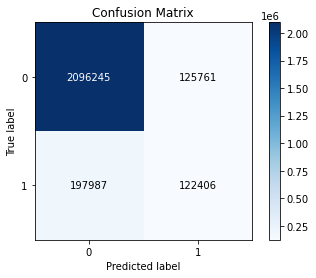

In [22]:
print('F1 Score: {}'.format(f1_score(y_pred, y_test)))
print(classification_report(y_pred, y_test))
plot_confusion_matrix(y_pred, y_test)